# Getting started with the Keras sequential model

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys
import random

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

1.14.0


In [2]:
# Set common constants
this_repo_url = 'https://github.com/CLynie/Lynie_tensorflow-tutorial/blob/master/'
this_tutorial_url = this_repo_url + 'Classification_of_MNIST '

The MNIST dataset containss 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">


Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9.

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

We <b> scale these values </b> to a range of <b> 0 to 1 </b> before feeding to the neural network model. For this, we divide the values by 255. It's important that the **_training set_** and the **_testing set_** are preprocessed in the same way:

In [4]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
print(np.shape(train_images))
test_images = preprocess_images(test_images)

(60000, 28, 28, 1)


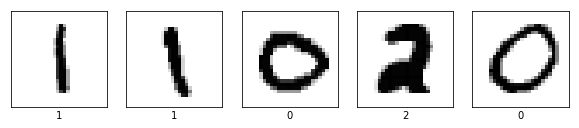

In [5]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    rd = random.randrange(train_images.shape[0]-5)
    plt.imshow(train_images[i+rd].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i+rd])

### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. In many cases, this can be reduced to simply stacking together layers:

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [6]:
epochs = 5

for active in ['relu','tanh','sigmod']:
    model = keras.Sequential()
    # 32 convolution filters used each of size 3x3
    model.add(Conv2D(32, kernel_size=(3, 3), activation=active, input_shape=(28, 28, 1)))
    # 64 convolution filters used each of size 3x3
    model.add(Conv2D(64, (3, 3), activation=active))
    # choose the best features via pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # randomly turn neurons on and off to improve convergence
    model.add(Dropout(0.25))
    # flatten since too many dimensions, we only want a classification output
    model.add(Flatten())
    # fully connected to get all relevant data
    model.add(Dense(128, activation=active))
    # one more dropout
    model.add(Dropout(0.5))
    # output a softmax to squash the matrix into output probabilities
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs)
    print(test_images.shape)
    test_loss, test_acc = model.evaluate(test_images, test_labels)

    print(active + '\'s Test accuracy:', test_acc)

W0702 16:27:41.506225 4475065792 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
60000/60000 [==============================] - 217s 4ms/sample - loss: 0.2129 - acc: 0.9356
Epoch 2/5
60000/60000 [==============================] - 217s 4ms/sample - loss: 0.1199 - acc: 0.9637
Epoch 3/5
60000/60000 [==============================] - 224s 4ms/sample - loss: 0.1078 - acc: 0.9666
Epoch 4/5
37856/60000 [=================>............] - ETA: 1:30 - loss: 0.1002 - acc: 0.9688

KeyboardInterrupt: 